In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from subprocess import check_output
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [6]:



avocado = pd.read_csv(r'C:\Users\Dell\Downloads\avocado.csv.zip')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
avocado.shape

(18249, 14)

In [8]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [11]:
avocado.drop("Unnamed: 0", axis=1,inplace=True) #dropping the column as it pnly contains index

In [12]:
#renaming columns for better understanding
avocado.rename(columns={'4046':'Small HASS sold',
                          '4225':'Large HASS sold',
                          '4770':'XLarge HASS sold'}, 
                 inplace=True)

In [13]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [14]:
avocado.type.unique()

array(['conventional', 'organic'], dtype=object)

In [15]:
avocado = pd.get_dummies(avocado, columns=['type'],drop_first=True)
avocado.head()

,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,0


In [16]:
print("Organic ",avocado[avocado["type_organic"]==1]["Date"].count())
print("conventional ",avocado[avocado["type_organic"]==0]["Date"].count())

Organic  9123
conventional  9126


<AxesSubplot:>

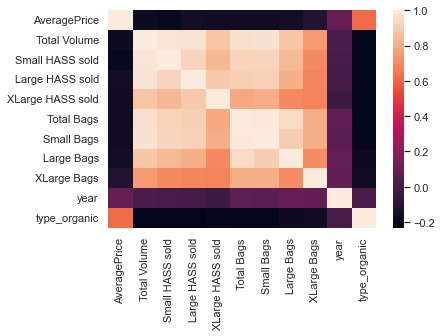

In [17]:
sns.heatmap(avocado.corr())

In [18]:
#label encode region

le = LabelEncoder()
avocado['region'] = le.fit_transform(avocado['region'])
avocado.head()


,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0


In [19]:
avocado.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

<AxesSubplot:>

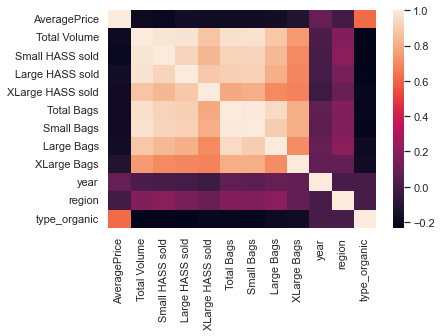

In [20]:
sns.heatmap(avocado.corr())

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Distribution of average price', ylabel='Density'>

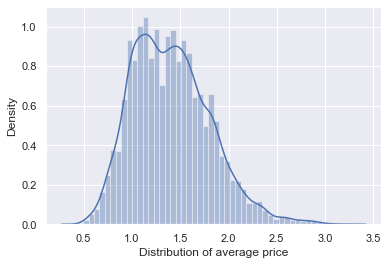

In [21]:
sns.distplot(avocado["AveragePrice"],axlabel="Distribution of average price")

<AxesSubplot:xlabel='type_organic', ylabel='AveragePrice'>

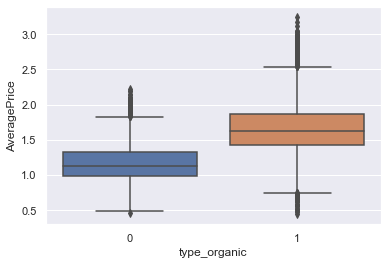

In [22]:
sns.boxplot(x="type_organic", y="AveragePrice", data=avocado)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

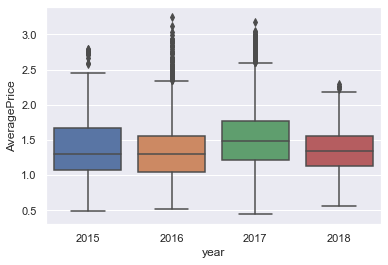

In [23]:
sns.boxplot(x="year", y="AveragePrice", data=avocado)

<AxesSubplot:xlabel='region'>

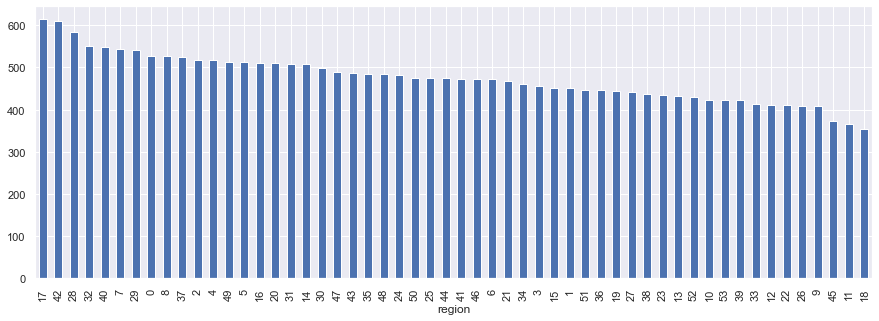

In [24]:
avocado.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

In [25]:
#Creating a new dataframe with few columns only and create train and test data
avocado_new=avocado[["AveragePrice","Total Volume","region","type_organic","Total Bags","year"]]

X=avocado_new[["AveragePrice","Total Volume","region","Total Bags","year"]] #feature columns
y=avocado_new.type_organic #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

scaler = StandardScaler().fit(avocado_new)
avocado_new_std = scaler.transform(avocado_new)
avocado_new = pd.DataFrame(avocado_new_std)
avocado_new.columns = ['AveragePrice', 'Total Volume', "region",'type_organic','Total Bags', 'year']
avocado_new.head()

X Train Shape  (14599, 5)
Y Train Shape  (14599,)
X Test Shape  (3650, 5)
Y Test Shape  (3650,)


,AveragePrice,Total Volume,region,type_organic,Total Bags,year
0,-0.188689,-0.227716,-1.700252,-0.999836,-0.234170,-1.221282
1,-0.139020,-0.230427,-1.700252,-0.999836,-0.233350,-1.221282
2,-1.182069,-0.212085,-1.700252,-0.999836,-0.234730,-1.221282
3,-0.809551,-0.223444,-1.700252,-0.999836,-0.237096,-1.221282
4,-0.312861,-0.231538,-1.700252,-0.999836,-0.236718,-1.221282


In [26]:
feature_cols = ['Total Volume', "region",'type_organic','Total Bags', 'year']                # create a Python list of feature names
X = avocado_new[feature_cols]                                     # use the list to select a subset of the original DataFrame-+
y = avocado_new.AveragePrice


def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_test, y_train, y_test=split(X,y)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (14599, 5)
y_train shape:  (14599,)
X_test shape:  (3650, 5)
y_test shape:  (3650,)


In [27]:
linreg1 = LinearRegression()
linreg1.fit(X_train, y_train) 

feature_cols.insert(0,'Intercept')
coef = linreg1.coef_.tolist()
coef.insert(0, linreg1.intercept_)
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

y_pred_train = linreg1.predict(X_train)
y_pred_test = linreg1.predict(X_test)

Intercept -0.002726525050523259
Total Volume -0.05424721790222354
region -0.003869933356251104
type_organic 0.6032984224026802
Total Bags 0.0023670606494497204
year 0.09223221926899529


In [28]:
print("Model Evaluation for Linear Regression Model 1")

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = linreg1.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

yhat = linreg1.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Linear Regression Model 1
RMSE for training set is 0.7810035858497618  and RMSE for test set is 0.7788188797065335
r_squared for test data  0.38976425151927596  and adjusted_r_squared for test data 0.389555166427629
r_squared for test data  0.39450378819865217  and adjusted_r_squared for test data 0.3936729756138534


In [29]:
avocado_full=avocado[[ 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region']]
avocado_full.head()

,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type_organic,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [30]:
scaler = StandardScaler().fit(avocado_full)
avocado_full_std = scaler.transform(avocado_full)
avocado_full = pd.DataFrame(avocado_full_std)
avocado_full.columns = [ 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region']

feature_cols = [ 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region']                # create a Python list of feature names
X = avocado_full[feature_cols]                                     # use the list to select a subset of the original DataFrame-+

y = avocado_full.AveragePrice


def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_test, y_train, y_test=split(X,y)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (14599, 11)
y_train shape:  (14599,)
X_test shape:  (3650, 11)
y_test shape:  (3650,)


In [31]:
linreg2 = LinearRegression()
linreg2.fit(X_train, y_train) 

feature_cols.insert(0,'Intercept')
coef = linreg2.coef_.tolist()
coef.insert(0, linreg2.intercept_)
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

y_pred_train = linreg2.predict(X_train)
y_pred_test = linreg2.predict(X_test)    

Intercept -0.0023505754266631785
Total Volume -517.6834804383805
Small HASS sold 189.31964173225612
Large HASS sold 180.83743712076392
XLarge HASS sold 15.996361634755118
Total Bags 4352.096403792334
Small Bags -3180.859419632823
Large Bags -1040.0914895532812
XLarge Bags -75.34998015261648
type_organic 0.6054455041346714
year 0.09258218687522168
region 0.012235265603031564


In [32]:
print("Model Evaluation for Linear Regression Model 2")

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = linreg2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, "and adjusted_r_squared for train data",adjusted_r_squared)

yhat = linreg2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, "and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Linear Regression Model 2
RMSE for training set is 0.7706964525653129  and RMSE for test set is 0.7686205107189591
r_squared for train data  0.4057648877892035 and adjusted_r_squared for train data 0.40531677740089067
r_squared for test data  0.41025749859346594 and adjusted_r_squared for test data 0.4084743299525996


In [33]:
model2 = RandomForestRegressor(random_state = 0)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test) 

In [34]:
print("Model Evaluation for Random Forest Regressor ")
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = model2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

yhat = model2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Random Forest Regressor 
RMSE for training set is 0.14665421945212695  and RMSE for test set is 0.3785537787361089
r_squared for train data  0.9784830497639547  and adjusted_r_squared for train data 0.9784668239154186
r_squared for test data  0.8569480902808353  and adjusted_r_squared for test data 0.8565155528957581
